In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

### Download assets

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets....", end="")

    # Download zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
        

In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), "assets/nb2/opencv_bootcamp_assets_NB2.zip")

if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)


### Original checkerboard image

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

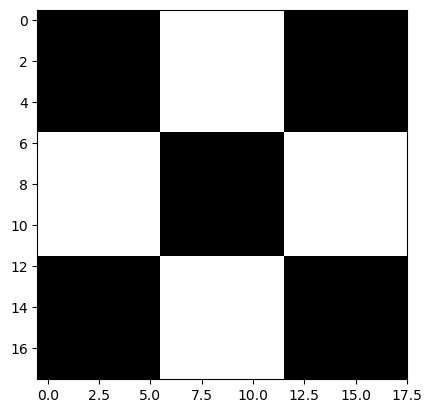

In [4]:
cb_img = cv2.imread('assets/nb2/checkerboard_18x18.png', 0)
plt.imshow(cb_img, cmap='gray')
print(cb_img)

### accessing individual pixels

In [5]:
print(cb_img[0,0])
print(cb_img[0,8])

0
255


### modifying image pixels

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

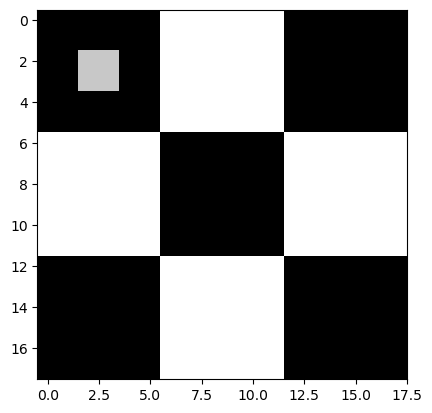

In [7]:
cb_img_coy = cb_img.copy()
cb_img_coy[2 ,2] = 200
cb_img_coy[2, 3] = 200
cb_img_coy[3, 2] = 200
cb_img_coy[3, 3] = 200

plt.imshow(cb_img_coy, cmap='gray')
print(cb_img_coy)

### cropping images

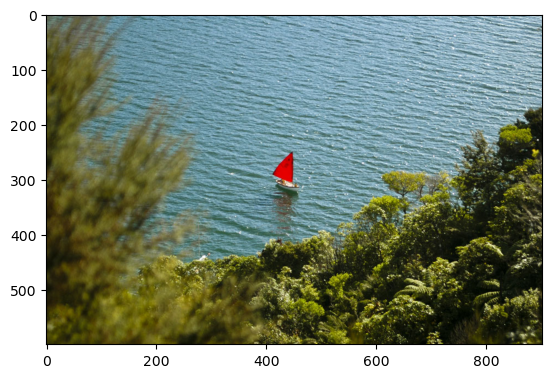

In [8]:
# crop by selecting subset of pixels of an image
img_NZ_bgr = cv2.imread('assets/nb2/New_Zealand_Boat.jpg', cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

In [11]:
print(img_NZ_rgb.shape)
print(img_NZ_rgb.shape[0])
print(img_NZ_rgb.shape[1])


(600, 903, 3)
600
903


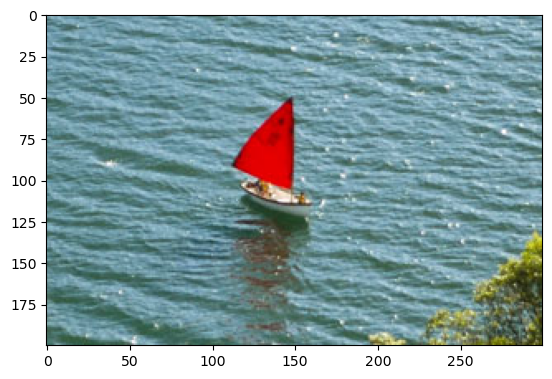

In [12]:
# crop out middle region
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

### Resizing images

``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```



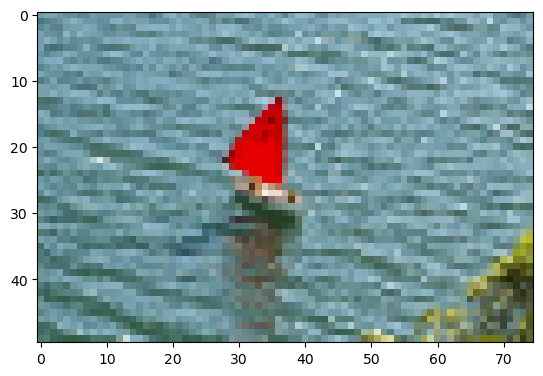

In [17]:
# method 1: specifying scaling factor using fx, fy:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=.25, fy=.25)
plt.imshow(resized_cropped_region_2x)

In [18]:
# method 2: specifying exact size of output image:

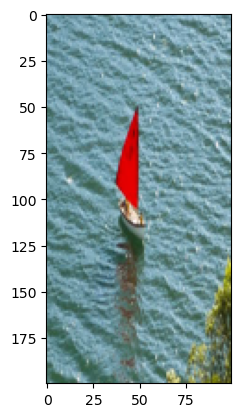

In [19]:
new_width = 100
new_height = 200
dim = (new_width, new_height)

resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### Resize while maintaining aspect ratio

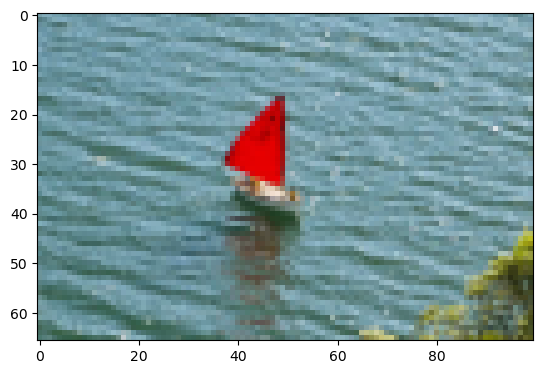

In [21]:
new_width = 100
aspect_ratio = new_width / cropped_region.shape[1]
new_height = int(cropped_region.shape[0] * aspect_ratio)
dim  = (new_width, new_height)

# resize
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

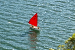

In [22]:
# save cropped image and display it
resized_cropped_region_2x = resized_cropped_region_2x[:, :, ::-1]
cv2.imwrite('assets/nb2/resized_cropped_region_2x.png', resized_cropped_region_2x)
Image(filename='assets/nb2/resized_cropped_region_2x.png')